### Dataset & EDA

In [ ]:
from google.colab import files
files.upload()

Saving random_dataset.csv to random_dataset.csv


{'random_dataset.csv': b'title,text,subject,date,label\n"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a \xe2\x80\x9cfiscal conservative\xe2\x80\x9d on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS\xe2\x80\x99 \xe2\x80\x9cFace the Nation,\xe2\x80\x9d drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Repu

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!ls /content

Fake.csv  random_dataset.csv  sample_data  True.csv


In [ ]:
!unzip fake-and-real-news-dataset.zip

unzip:  cannot find or open fake-and-real-news-dataset.zip, fake-and-real-news-dataset.zip.zip or fake-and-real-news-dataset.zip.ZIP.


In [ ]:
import pandas as pd

In [ ]:
true = pd.read_csv('/content/True.csv')

In [ ]:
true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [ ]:
fake = pd.read_csv('/content/Fake.csv')

In [ ]:
fake.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [ ]:
true.shape

(21417, 4)

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true['label'] = 1

In [ ]:
true.head(3)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [ ]:
fake['label'] = 0

In [ ]:
fake.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [ ]:
frames = [true.loc[0:5000][:], fake.loc[0:5000][:]]
df = pd.concat(frames)

In [ ]:
df.shape

(10002, 5)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,title,text,subject,date,label
0,What Republicans Are Doing To Stop People Fro...,"Let s face it, if it weren t for gerrymanderin...",News,"April 10, 2017",0
1,Trump Administration IRATE After Judge Halts ...,Following a Boston judge s refusal to renew th...,News,"February 4, 2017",0
2,GOP Lawmaker Links Abortion To The Economy In...,Republican lawmakers come up with the most rid...,News,"November 4, 2017",0
3,Education Secretary DeVos faces largely silent...,"CAMBRIDGE, Mass. (Reuters) - U.S. Education Se...",politicsNews,"September 28, 2017",1
4,WATCH: Senator Al Franken Just Ripped Ted Cru...,Ted Cruz accused Senator Al Franken of lying a...,News,"February 1, 2017",0


In [ ]:
X = df.drop('label', axis=1)

In [ ]:
y = df['label']

In [ ]:
df = df.dropna()

In [ ]:
messages = df.copy()

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
messages.head()

,index,title,text,subject,date,label
0,0,What Republicans Are Doing To Stop People Fro...,"Let s face it, if it weren t for gerrymanderin...",News,"April 10, 2017",0
1,1,Trump Administration IRATE After Judge Halts ...,Following a Boston judge s refusal to renew th...,News,"February 4, 2017",0
2,2,GOP Lawmaker Links Abortion To The Economy In...,Republican lawmakers come up with the most rid...,News,"November 4, 2017",0
3,3,Education Secretary DeVos faces largely silent...,"CAMBRIDGE, Mass. (Reuters) - U.S. Education Se...",politicsNews,"September 28, 2017",1
4,4,WATCH: Senator Al Franken Just Ripped Ted Cru...,Ted Cruz accused Senator Al Franken of lying a...,News,"February 1, 2017",0


In [ ]:
messages['title'][2]

' GOP Lawmaker Links Abortion To The Economy In One Bizarre And Horribly Offensive Rant (VIDEO)'

In [ ]:
messages['text'][2]

'Republican lawmakers come up with the most ridiculous things to push their agendas. Take women s reproductive rights. They have all manner of reasons for why abortion should be illegal; from the misogynistic, religious and moral reasons all the way over to the misogynistic and outright bizarre ones. A lawmaker in Wisconsin just tossed himself into the  misogynistic and outright bizarre  corner with the most ridiculous and offensive idea out there: Labor force shortages are tied to population declines. Labor force shortages are a limiting factor in economic growth. And limited economic growth poses a problem when government tries to pay for public services and infrastructure. In spite of this Mr. Speaker, ironically, the Democrats continue their effort to support the abortion industry. Yes, he really did essentially say that women should be forced to give birth, even to children they can t care for, to ensure a strong labor force and thus, a stronger economy.Holy hell, this is right up

### Preprocessing

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(corpus)

10002

In [ ]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
X = tfidf_v.fit_transform(corpus).toarray()
y = messages['label']

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,...,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.0,0.024922,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.039049,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Passive Aggressive Classifier - Baseline

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.998


In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


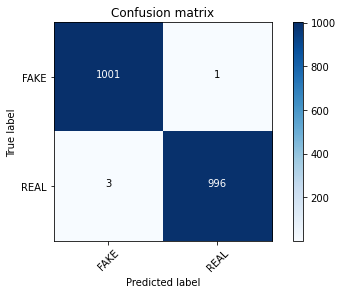

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1])

### Preprocess and transform datapoint text (true['text'][16888]) and try to predict it based on the model

In [ ]:
review = re.sub('[^a-zA-Z]', ' ', true['text'][16888])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'cairo reuter three polic offic kill eight other injur shoot raid suspect milit hideout giza southwest egyptian capit two secur sourc said friday sourc said author follow lead apart thought hous eight suspect member hasm group claim sever attack around capit target judg policemen sinc last year suspect milit fled exchang fire sourc said egypt accus hasm milit wing muslim brotherhood islamist group outlaw muslim brotherhood deni islamist insurg sinai peninsula grown sinc militari overthrew presid moham mursi muslim brotherhood mid follow mass protest rule milit group stage insurg pledg allegi islam state blame kill hundr soldier policemen start target area includ egypt christian copt'

In [ ]:
val = tfidf_v.transform([review]).toarray()

In [ ]:
pd.DataFrame(val, columns=tfidf_v.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,...,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
classifier.predict(val)

array([1])

### Saving model and TFIDF Vectorizer

In [ ]:
from sklearn.externals import joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(classifier, 'model.pkl')

['model.pkl']

In [ ]:
joblib.dump(tfidf_v, 'tfidfvect.pkl')

['tfidfvect.pkl']

### Load model and vectorizer and predict on previous preprocessed datapoint

In [ ]:
joblib_model = joblib.load('model.pkl')

In [ ]:
joblib_tfidfvect = joblib.load('tfidfvect.pkl')

In [ ]:
val_pkl = joblib_tfidfvect.transform([review]).toarray()

In [ ]:
joblib_model.predict(val_pkl)

array([1])

### Save some datapoints for text random generation

In [ ]:
frames_2 = [true.loc[0:10][:], fake.loc[0:10][:]]
df_2 = pd.concat(frames_2)

In [ ]:
df_2.to_csv('random_dataset.csv', index=False)